In [1]:
import os, sys
lib_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(lib_path)

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/lho/Htw/bachelor/thesis-code/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [44]:
from metric import MetricRecorder, MetricReader, plt
import matplotlib.patches as mpatches

In [45]:
mr = MetricReader(config_dir_path='../src/sae.json')
m = MetricRecorder(config_dir_path='../src/sae.json')

In [49]:
cur = m.trainings.find({'job_id' : 8})
cur.next()

{u'_id': ObjectId('56a787b0d8780d3df5b6d3a5'),
 u'algorithm': u'rmsprop',
 u'dropouts': u'0.0, 0.0, 0.0',
 u'eta': 0.01,
 u'improvement_threshold': 0.995,
 u'job_id': 8,
 u'layers': u'dAe[0.200](25, 80)-dAe[0.400](80, 50)-FC(50, 1)',
 u'lmbda': 0.0,
 u'mini_batch_size': 200,
 u'momentum': 0.0,
 u'patience_increase': 2,
 u'training_data': 191,
 u'validation_data': 191,
 u'validation_frequency': 2}

In [37]:
mr.get_records(job_id=2)

,_id,cost,epoch,eta,iteration,job_id,second,type,validation_accuracy
0,56a76790d8780d2ef025965b,0.360337,0,0.01,NaN,2,2.790958,pretrain_0,NaN
1,56a76792d8780d2ef025965c,0.348282,1,0.01,NaN,2,4.725231,pretrain_0,NaN
2,56a76798d8780d2ef025965d,0.427409,0,0.01,NaN,2,10.383625,pretrain_1,NaN
3,56a7679dd8780d2ef025965e,0.417448,1,0.01,NaN,2,15.055898,pretrain_1,NaN
4,56a767a0d8780d2ef0259660,0.003360,0,NaN,275,2,18.587104,train,0.004612
5,56a767a2d8780d2ef0259661,0.002767,0,NaN,550,2,20.133477,train,0.004535
6,56a767a3d8780d2ef0259662,0.001390,1,NaN,825,2,21.802568,train,0.002708
7,56a767a5d8780d2ef0259663,0.000468,1,NaN,1100,2,23.242079,train,0.002050


In [9]:
mr.get_records(job_id=14)

,_id,cost,epoch,iteration,job_id,second,validation_accuracy
0,56a205e3f2684a3d099f3bbd,0.096270,0,6000,14,27.789068,0.001632
1,56a205f3f2684a3d099f3bbe,0.071697,0,12000,14,43.688841,0.000680
2,56a20602f2684a3d099f3bbf,0.067720,0,18000,14,59.456953,0.000328
3,56a20612f2684a3d099f3bc0,0.076173,0,24000,14,75.509454,0.000379
4,56a20622f2684a3d099f3bc1,0.088916,0,30000,14,91.243428,0.000334
5,56a20636f2684a3d099f3bc2,0.093486,1,36000,14,111.361934,0.000632
6,56a20646f2684a3d099f3bc3,0.070532,1,42000,14,127.350275,0.000283
7,56a20656f2684a3d099f3bc4,0.066232,1,48000,14,143.036557,0.000182
8,56a20666f2684a3d099f3bc5,0.075264,1,54000,14,158.946592,0.000236
9,56a20675f2684a3d099f3bc6,0.087990,1,60000,14,174.642586,0.000257


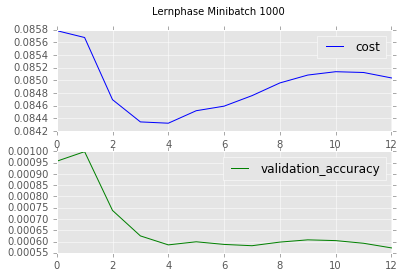

In [23]:
mr.plot_epoches(job_id=15, title='Lernphase Minibatch 1000')

/home/lho/Htw/bachelor/thesis-code/venv/lib/python2.7/site-packages/pandas/tools/plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


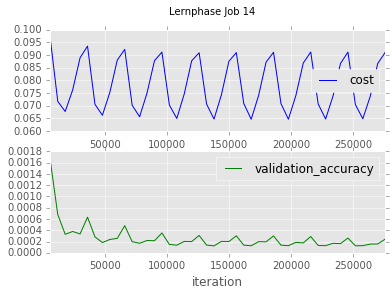

In [18]:
mr.plot(job_id=14)

0.0025000000000000001

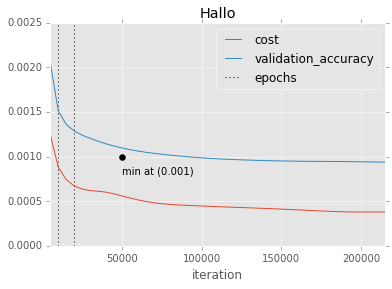

In [27]:
fig, ax = plt.subplots(1, 1)
ax.plot(xy=(50000, 0.001), marker='o', color="r", linestyle="None", label="test")
records[['cost', 'validation_accuracy', 'iteration']].plot(x='iteration', 
                                                           y=['cost', 'validation_accuracy'],
                                                           title="Hallo",
                                                           sharey=True, ax=ax)
ax.vlines(x=[10000,20000], ymin=[0],ymax=[0.0025], label='epochs', linestyle='dotted')
#ax.annotate('min', xy=(50000, 0.001), xytext=(50000+30000, 0.0016), arrowprops=dict(facecolor='black', shrink=0.003))
ax.annotate('min at (0.001)', xy=(50000, 0.001), xytext=(50000, 0.0008), arrowprops=None)
ax.plot(50000, 0.001, 'o', color="k")
ax.legend()
ax.get_ylim()[1]


In [98]:
records['iteration'].values

array([  4999,   9999,  14999,  19999,  24999,  29999,  34999,  39999,
        44999,  49999,  54999,  59999,  64999,  69999,  74999,  79999,
        84999,  89999,  94999,  99999, 104999, 109999, 114999, 119999,
       124999, 129999, 134999, 139999, 144999, 149999, 154999, 159999,
       164999, 169999, 174999, 179999, 184999, 189999, 194999, 199999,
       204999, 209999, 214999])

[]

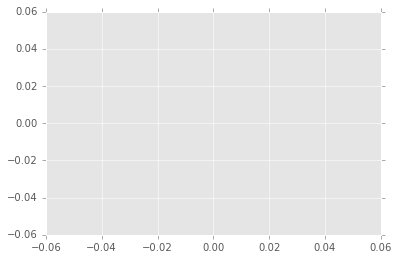

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x=records['iteration'].values, y=records['cost'].values)

In [ ]:
ax = fig.add_subplot

In [36]:
metric.metrics.name

u'db.meta'

In [178]:
metric.metrics.distinct('job_id')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [173]:
cur.next()

StopIteration: 

In [91]:
cur2.next()

{u'_id': ObjectId('569e75eff2684a2a9369a51b'),
 u'constants': {u'X_dirpath': u'../../../data/train/*',
  u'batchsize': 5000000,
  u'epochs': 100,
  u'improvement_threshold': 0.995,
  u'limit': 30,
  u'lmbda': 0.0,
  u'mini_batch_size': 500,
  u'patience': 20000,
  u'patience_increase': 2,
  u'validation_frequency': 5000,
  u'y_dirpath': u'../../../data/train_cleaned/'},
 u'experiment_name': u'metric-test'}